In [110]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import csv
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [111]:
test_data = pd.read_csv("/kaggle/input/medical-treatment-dataset/testms.csv")
train_data = pd.read_csv("/kaggle/input/medical-treatment-dataset/trainms.csv")


     Age  Gender_A little about you  Gender_Agender  Gender_Androgyne  \
0     37                      False           False             False   
1     44                      False           False             False   
2     32                      False           False             False   
3     31                      False           False             False   
4     31                      False           False             False   
..   ...                        ...             ...               ...   
995   35                      False           False             False   
996   39                      False           False             False   
997   31                      False           False             False   
998   32                      False           False             False   
999   27                      False           False             False   

     Gender_Cis Female  Gender_Cis Male  Gender_Enby  Gender_F  Gender_Femake  \
0                False            False   

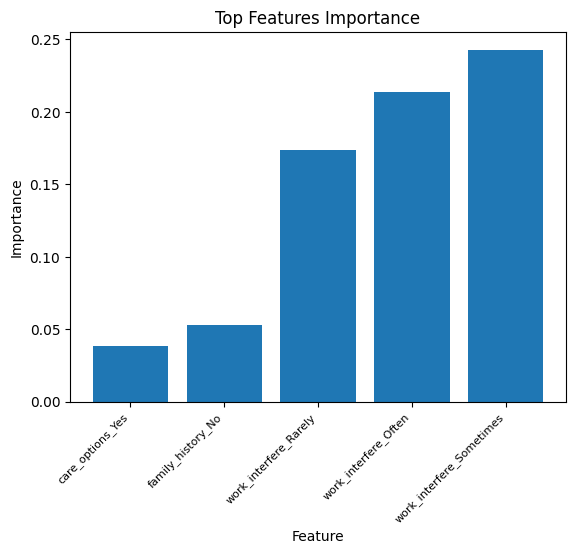

In [112]:
# Drop unnecessary columns (if needed)
train_data = train_data.drop(columns=['s.no', 'Timestamp', 'comments'])
test_data = test_data.drop(columns=['s.no', 'Timestamp', 'comments'])
        
# Split the data into features and target variable
X = train_data.drop('treatment', axis=1)
X = pd.get_dummies(X)
print(X)
y = train_data['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Get feature importances
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Get the indices of the top N most important features
top_n = 5  # You can adjust this based on your preference
top_feature_indices = np.argsort(feature_importances)[-top_n:]

# Get the names of the top N most important features
top_feature_names = feature_names[top_feature_indices]


# Plot the feature importances
plt.bar(top_feature_names, feature_importances[top_feature_indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top Features Importance')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()




In [113]:
gb_errors = X_val[y_test != y_pred]

In [114]:
common_attributes_gb_errors = gb_errors.mean().round(2).sort_values(ascending=False)

In [117]:
print("Common Attributes for Gradient boosting Errors:")
print(common_attributes_gb_errors[0:10])

Common Attributes for Gradient boosting Errors:
Age                           30.79
obs_consequence_No             0.89
tech_company_Yes               0.89
family_history_No              0.86
self_employed_No               0.82
mental_health_interview_No     0.82
phys_health_consequence_No     0.75
coworkers_Some of them         0.68
remote_work_No                 0.68
wellness_program_No            0.68
dtype: float64


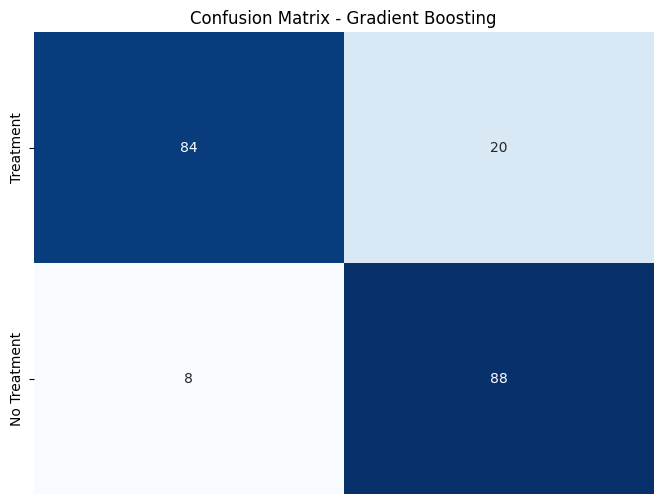

In [116]:
dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels = False, 
             yticklabels=['Treatment', 'No Treatment'], cbar=False)
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()
